In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-05-19 / Aki Taanila


# Kynttiläkaavioita ja liukuvia keskiarvoja

Tässä muistiossa noudetaan dataa Yahoo Finance -palvelusta **yfinance**-paketin avulla. **yfinance**-kirjaston asennus Minicondan ja Anacondan käyttäjille komentorivin kautta: `pip install yfinance`. Lisätietoa https://github.com/ranaroussi/yfinance.

Jos tiedon hakuu Yahoo Finance -palvelusta ei onnistu, niin kannattaa päivittää yfinance uusimpaan versioon. Minicondan/Anacondan komentorivillä päivityksen voi tehdä komennolla `pip install yfinance --upgrade`

Seuraavassa käytetään kaavioiden luontiin **mplfinance**-pakettia, jonka Minicondan ja Anacodan käyttäjät voivat asentaa komentoriviltä komennolla
`pip install mplfinance --upgrade`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

## Datan nouto

Kurssihistorioita voit noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance elisa' löydät Elisan tunnuksen Yahoossa (ELISA.HE).

In [3]:
elisa = yf.download('ELISA.HE', start='2025-1-1')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
elisa

Price,Close,High,Low,Open,Volume
Ticker,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE
Date,,,,,
2025-01-02,41.263363,41.263363,40.932165,40.932165,127934
2025-01-03,41.010090,41.263361,40.912680,41.165948,166267
2025-01-07,40.932163,41.088021,40.562000,41.088021,261036
2025-01-08,40.347694,41.049056,40.035979,40.932163,215447
2025-01-09,40.425625,40.620448,40.269767,40.425625,133347
...,...,...,...,...,...
2025-05-13,44.480000,45.000000,44.259998,44.860001,215126
2025-05-14,44.480000,44.779999,44.299999,44.439999,255401


Kuten huomaat, niin datassa on sarakeotsikoita kahdella rivillä (Price ja Ticker). Tämä niin kutsuttu multiindex pitää purkaa mplfinance-pakettia käytettäessä. Ticker-otsikot voi poistaa seuraavasti:

In [5]:
elisa.columns = elisa.columns.droplevel(1)
elisa

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,41.263363,41.263363,40.932165,40.932165,127934
2025-01-03,41.010090,41.263361,40.912680,41.165948,166267
2025-01-07,40.932163,41.088021,40.562000,41.088021,261036
2025-01-08,40.347694,41.049056,40.035979,40.932163,215447
2025-01-09,40.425625,40.620448,40.269767,40.425625,133347
...,...,...,...,...,...
2025-05-13,44.480000,45.000000,44.259998,44.860001,215126
2025-05-14,44.480000,44.779999,44.299999,44.439999,255401
2025-05-15,45.340000,45.340000,44.459999,44.580002,296186


## Kynttiläkaavio

Parametri `show_nontrading=True` näyttää tyhjän välin viikonloppujen kohdalla.

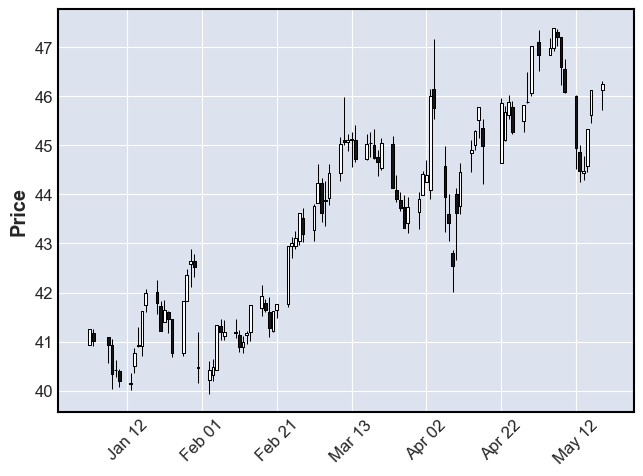

In [6]:
mpf.plot(elisa, type='candle', show_nontrading=True)

## Vaihdon määrä

Parametri **volume=True** lisää kaavioon vaihdon määrän (Volume).

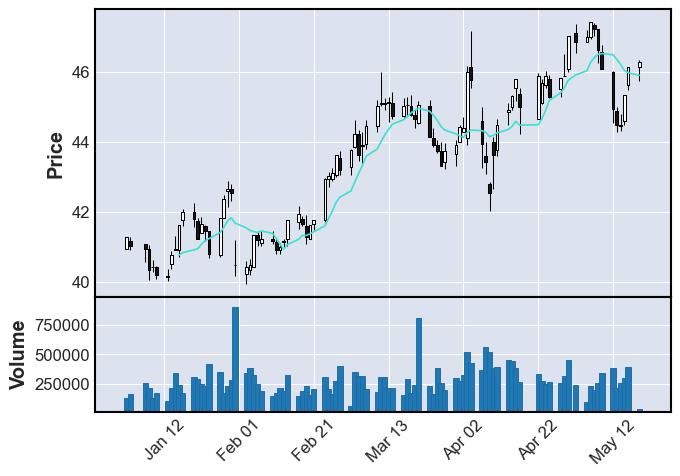

In [7]:
mpf.plot(elisa['2024-1':], type='candle', mav=(10), volume=True, show_nontrading=True)

## Liukuvia keskiarvoja

Parametri **mav=(50, 150)** piirtää 50 päivän ja 150 päivän liukuvat keskiarvot. 

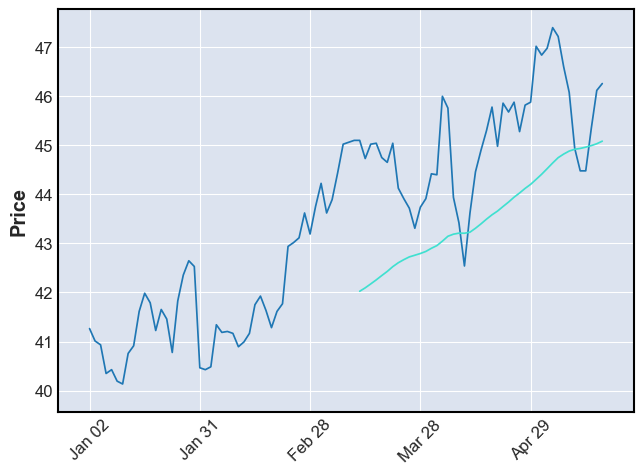

In [8]:
mpf.plot(elisa['2023':], type='line', mav=(50, 150))

## Lisätietoa

https://github.com/matplotlib/mplfinance